In [2]:
import pandas as pd # 데이터분석을 위한 패키지
import numpy as np # 고차원의 숫자배열을 다루기 위한 패키지
import matplotlib.pyplot as plt # 차트/그래프에 시각화하기 위한 패키지

file_path = "C:/data/Gwangju_Gu.csv" # 파일 불러오기
df = pd.read_csv(file_path, sep=',') # 데이터프레임 생성하기
df

,구,인구,인구밀도,1020인구,유동인구,헌혈실적
0,광산구,405315,133421.79,80220,2170000,12710
1,북구,433533,261526.58,83765,1840000,20502
2,동구,98585,83645.37,17551,592078,507
3,남구,218060,198772.19,39208,808270,26182
4,서구,300975,226923.42,61002,1880000,31756


In [3]:
df.isnull().sum() # 결측치 체크

구         0
인구        0
인구밀도      0
1020인구    0
유동인구      0
헌혈실적      0
dtype: int64

In [11]:
corr = df.corr(method = 'pearson') # 피어슨 상관계수


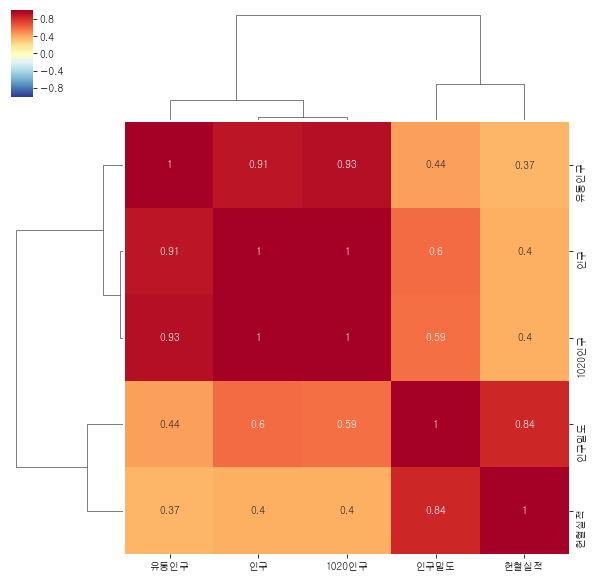

In [54]:
import seaborn as sns # 예쁜 히트맵을 그리기 위한 패키지
from matplotlib import font_manager, rc # 한글폰트깨짐 방지

# 한국어 폰트 깨짐 방지 코드----------------
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
#-------------------------------------------

sns.clustermap(corr, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)
# -1~1 사이의 color로 clustermap 제작 == 히트맵 제작이랑 같은 말

In [55]:
new_df = pd.DataFrame(data=df,
                      columns=['인구밀도', '1020인구', '유동인구', '헌혈실적'])
#상관계수가 1인 인구-1020인구 중 '1020인구'만 사용하기로 결정
#상관계수가 1이면 매우 밀접한 관계가 있다는 뜻이므로 한 가지의 변수만 사용한다
#따라서 새로운 dataframe을 만들어 다시 상관계수분석을 한다.
new_df

,인구밀도,1020인구,유동인구,헌혈실적
0,133421.79,80220,2170000,12710
1,261526.58,83765,1840000,20502
2,83645.37,17551,592078,507
3,198772.19,39208,808270,26182
4,226923.42,61002,1880000,31756


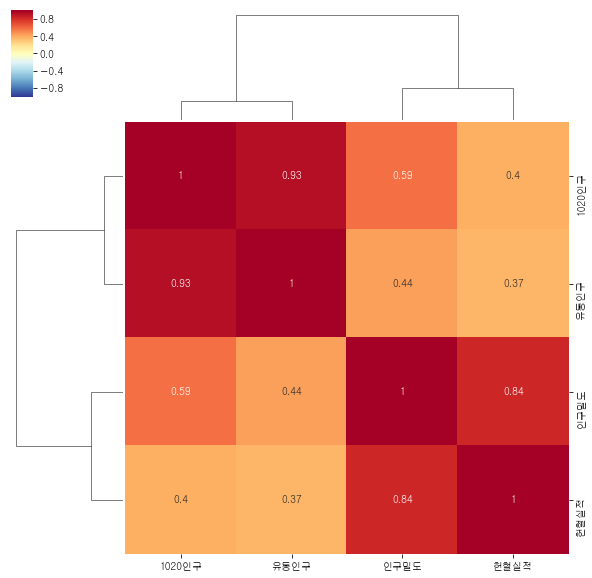

In [56]:
corr = new_df.corr(method = 'pearson') # 새로운 dataframe에 대한 상관계수분석
sns.clustermap(corr, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1) # 최종 히트맵을 그리는 코드